In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv('StudentsPerformance.csv')

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,success
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
df.dropna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,success
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [26]:
df['test preparation course']=df['test preparation course'].replace('none','0').replace('completed','1')

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,success
0,female,group B,bachelor's degree,standard,0,72,72,74
1,female,group C,some college,standard,1,69,90,88
2,female,group B,master's degree,standard,0,90,95,93
3,male,group A,associate's degree,free/reduced,0,47,57,44
4,male,group C,some college,standard,0,76,78,75


In [28]:
df['gender']=df.gender.replace('female','0').replace('male','1')

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,success
0,0,group B,bachelor's degree,standard,0,72,72,74
1,0,group C,some college,standard,1,69,90,88
2,0,group B,master's degree,standard,0,90,95,93
3,1,group A,associate's degree,free/reduced,0,47,57,44
4,1,group C,some college,standard,0,76,78,75


In [30]:
df['lunch']=df['lunch'].replace('standard','0').replace('free/reduced','1')

In [31]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,success
0,0,group B,bachelor's degree,0,0,72,72,74
1,0,group C,some college,0,1,69,90,88
2,0,group B,master's degree,0,0,90,95,93
3,1,group A,associate's degree,1,0,47,57,44
4,1,group C,some college,0,0,76,78,75


In [32]:
df['race/ethnicity'].replace({'group A':'1','group B':'2', 'group C':'3',
                               'group D':'4','group E':'5'},inplace=True)

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,success
0,0,2,bachelor's degree,0,0,72,72,74
1,0,3,some college,0,1,69,90,88
2,0,2,master's degree,0,0,90,95,93
3,1,1,associate's degree,1,0,47,57,44
4,1,3,some college,0,0,76,78,75


In [34]:
df['parental level of education'].replace({'some high school':'1','high school':'1',"associate's degree":'2',
                                        'some college':'3',"bachelor's degree":'4',"master's degree":'5'},inplace=True)

In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,success
0,0,2,4,0,0,72,72,74
1,0,3,3,0,1,69,90,88
2,0,2,5,0,0,90,95,93
3,1,1,2,1,0,47,57,44
4,1,3,3,0,0,76,78,75


In [36]:
y=df.success

In [37]:
y

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: success, Length: 1000, dtype: int64

In [38]:
x=df.drop('success',axis='columns')

In [39]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,0,2,4,0,0,72,72
1,0,3,3,0,1,69,90
2,0,2,5,0,0,90,95
3,1,1,2,1,0,47,57
4,1,3,3,0,0,76,78
...,...,...,...,...,...,...,...
995,0,5,5,0,1,88,99
996,1,3,1,1,0,62,55
997,0,3,1,1,1,59,71
998,0,4,3,0,1,68,78


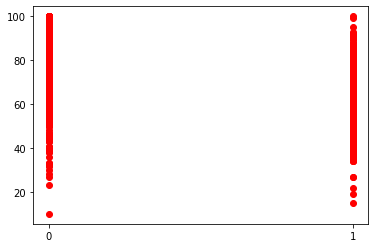

In [40]:
plt.figure()
plt.scatter(x['gender'],y,c='r')
plt.show()

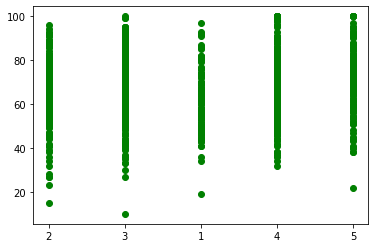

In [41]:
plt.figure()
plt.scatter(x['race/ethnicity'],y,c='g')
plt.show()

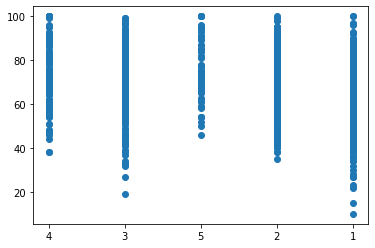

In [42]:
plt.figure()
plt.scatter(x['parental level of education'],y)
plt.show()

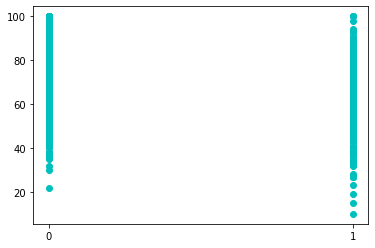

In [43]:
plt.figure()
plt.scatter(x['lunch'],y,c='c')
plt.show()

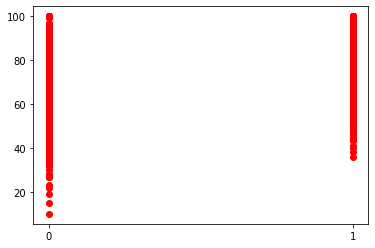

In [44]:
plt.figure()
plt.scatter(x['test preparation course'],y,c='r')
plt.show()

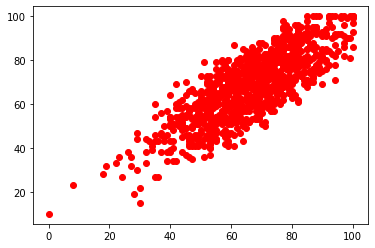

In [45]:
plt.figure()
plt.scatter(x['math score'],y,c='r')
plt.show()

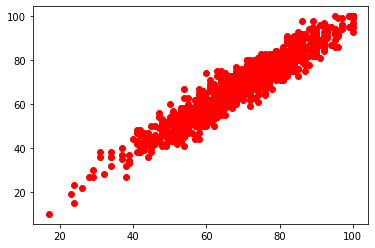

In [46]:
plt.figure()
plt.scatter(x['reading score'],y,c='r')
plt.show()

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((800, 7), (200, 7), (800,), (200,))

In [48]:
#linear regression 

In [49]:
model1=LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [50]:
model1.score(X_train,Y_train)

0.9437856395653766

In [51]:
model1.score(X_test,Y_test)

0.9413423239556798

In [52]:
y_pred=model1.predict(X_test)
y_pred

array([58.86563858, 84.34664549, 70.64432374, 58.13146924, 41.57561022,
       58.9785452 , 34.72274926, 64.57256548, 81.40102509, 59.15082912,
       75.14172611, 53.63857079, 67.35781465, 71.69766042, 88.97022386,
       22.96877939, 44.44276224, 84.0795875 , 87.1850875 , 59.76983323,
       64.12706187, 77.12902178, 28.5542922 , 67.06455723, 45.92743554,
       58.92304448, 71.46413242, 47.24622594, 74.31960963, 43.37259501,
       89.00561617, 65.7726435 , 87.49094677, 51.47602521, 65.56017814,
       53.5747829 , 51.90059686, 61.22171634, 57.17113958, 96.56671711,
       53.43648715, 66.42226653, 42.73453684, 79.5296265 , 44.84064284,
       59.66646733, 84.61788932, 73.85383983, 64.02656402, 52.32669507,
       87.82020359, 65.81919112, 48.5315173 , 40.94921121, 70.16911828,
       60.2118698 , 63.92603086, 73.27880413, 48.9114547 , 63.23828226,
       75.71669496, 67.25407006, 65.59787816, 88.49497164, 93.32511377,
       59.75596049, 57.98493298, 48.20364445, 68.77658162, 76.93

In [53]:
Y_test

937    57
606    82
720    70
816    64
131    40
       ..
627    46
547    64
579    68
588    65
668    61
Name: success, Length: 200, dtype: int64

In [54]:
#Lasso

In [55]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train,Y_train)

Lasso()

In [56]:
lasso_reg.score(X_train,Y_train)

0.9110992198598599

In [57]:
lasso_reg.score(X_test,Y_test)

0.9172216183118159

In [58]:
y_pred=lasso_reg.predict(X_test)
y_pred

array([57.10447394, 82.97510295, 70.43396821, 57.3393357 , 37.38334942,
       60.99317884, 32.98210583, 64.13729265, 84.86638784, 59.68086951,
       74.4543629 , 52.83492014, 66.76175752, 71.39386957, 87.11296696,
       23.89661068, 44.81960856, 83.81457184, 82.61973183, 54.72612814,
       64.11181486, 73.93048999, 27.95374047, 66.44623844, 44.05376366,
       56.82976015, 68.95323399, 43.8597072 , 75.04052558, 47.08463212,
       88.02183586, 66.39512908, 85.99886118, 53.47618548, 69.29023756,
       50.25844769, 54.40342193, 64.2986842 , 54.57599391, 94.86067499,
       50.8190557 , 62.09595041, 41.88776498, 75.61239091, 49.80405169,
       63.29079042, 84.47420473, 73.29633489, 62.97934153, 53.02178948,
       87.83496652, 62.26859928, 46.50557967, 42.52910721, 71.72368602,
       59.65539173, 65.6619491 , 72.86741667, 49.18826413, 60.9747344 ,
       76.04841936, 71.20700023, 62.95378685, 85.33915139, 97.93546568,
       57.07891927, 56.30174016, 44.31003301, 65.53018241, 73.40

In [59]:
#Ridge
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train,Y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [60]:
ridge_reg.score(X_train,Y_train)

0.9409740170477078

In [61]:
ridge_reg.score(X_test,Y_test)

0.939952995756177

In [62]:
y_pred=ridge_reg.predict(X_test)
y_pred

array([58.08926825, 83.67139757, 70.53027953, 58.05009294, 40.13337416,
       59.52289095, 34.02215022, 64.36417131, 81.95457733, 59.63820345,
       75.16412895, 53.126352  , 67.78438999, 71.50522374, 88.35885236,
       23.00218508, 44.77378953, 83.8381729 , 86.00428158, 58.28556338,
       64.19296148, 76.56434877, 28.5381682 , 66.85840051, 45.20204629,
       58.38327041, 70.89128667, 46.74816374, 74.65342271, 44.54261973,
       88.52202444, 66.46158488, 87.01406479, 52.11541265, 66.44901277,
       52.6455557 , 52.57389974, 62.02610897, 56.9453935 , 96.29432036,
       52.6540839 , 65.40638052, 42.84026046, 78.31873578, 46.2921987 ,
       60.49862253, 84.46655698, 73.93942624, 63.29841313, 52.51008128,
       87.45260802, 64.93558134, 47.99436846, 41.51819918, 70.52787251,
       59.84631595, 64.35314577, 73.65591592, 48.84181373, 62.47655356,
       75.91851182, 68.24350586, 65.02017781, 87.49146322, 94.86162653,
       58.8161718 , 57.50517138, 46.85375518, 68.29134801, 75.84

In [63]:
##Decision Tree Regression

In [65]:

from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [66]:
regressor.score(X_train,Y_train)

0.9994427501349616

In [67]:
regressor.score(X_test,Y_test)

0.8762287939783663

In [68]:
y_pred=regressor.predict(X_test)
y_pred

array([57. , 91. , 74. , 51. , 37. , 62. , 38. , 60. , 80. , 54. , 70. ,
       48. , 65. , 77. , 95. , 23. , 42. , 80. , 79. , 67. , 62. , 70. ,
       30. , 65. , 43. , 56. , 75. , 44. , 76. , 42. , 82. , 69. , 86. ,
       53. , 70. , 47. , 55. , 60. , 47. , 94. , 52. , 60. , 41. , 80. ,
       49. , 55. , 87. , 72. , 61. , 56. , 88. , 69. , 53. , 41. , 72. ,
       61. , 60. , 81. , 51. , 56. , 77. , 65. , 67. , 87. , 93. , 65. ,
       55. , 48. , 66. , 70. , 80. , 71. , 73. , 45. , 50. , 89. , 57. ,
       41. , 75. , 43. , 61. , 53. , 73. , 69. , 42. , 72. , 82. , 67. ,
       61. , 91. , 62. , 65. , 53. , 89. , 95. , 63. , 80. , 78. , 95. ,
       57. , 90. , 77. , 66. , 82. , 74. , 65. , 74. , 95. , 74. , 61. ,
       89. , 57. , 23. , 76. , 91. , 61. , 50. , 95. , 45. , 38. , 88. ,
       80. , 50. , 89. , 83. , 77. , 45. , 95. , 70. , 52. , 59. , 85. ,
       91. , 82. , 47. , 81. , 66. , 82. , 73. , 57. , 75. , 82. , 53. ,
       77. , 60. , 73. , 57. , 93. , 51. , 99. , 63